In [41]:
from sklearn import linear_model

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt


def main(fst):
    lines = fst.readlines()
    features_m = lines.pop(0)
    feature, m = features_m.strip().split(' ')
    X = []
    y = []
    for _ in range(int(m)):
        features_price = lines.pop(0)
        features_price_l = features_price.strip().split(' ')
        y.append(float(features_price_l[-1]))
        X.append(map(float, features_price_l[:-1]))

    num_val = lines.pop(0)
    Xval = []
    for _ in range(int(num_val)):
        features_val = lines.pop(0)
        features_val = features_val.strip().split(' ')
        Xval.append(map(float, features_val))

    clf = linear_model.LinearRegression()
    clf.fit (X, y)
    y_val = clf.predict(Xval)

    graph([x[0] + x[1] for x in Xval], y_val)
    graph([x[0] + x[1] for x in X], y)
    
    x = np.linspace(0, 1, 200)
    y = clf.predict(zip(x, x))

    graph([2*i for i in x], y, func=plt.plot)
    
    plt.show()


def graph(x, y, func=plt.scatter):
    items = zip(x, y)
    items.sort(key=lambda x: x[1])
    x = []
    y = []
    for i in items:
        x.append(i[0])
        y.append(i[1])

    func(x, y)

    plt.xlabel('feauture 1 + feature 2')
    plt.ylabel('house price per square root')

    plt.title("Simple Plot")

    plt.legend()

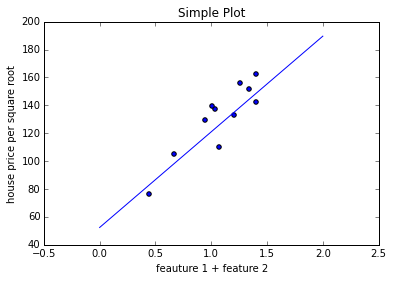

In [42]:
main(open('sample_input.txt'))

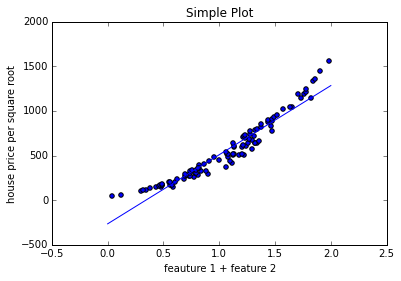

In [43]:
main(open('sample_pol.txt'))

# Battery Problem

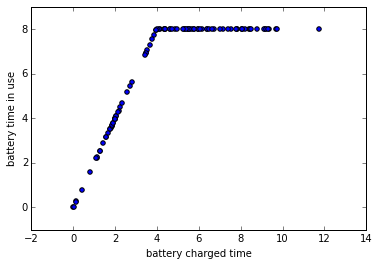

In [50]:
lines = open('trainingdata.txt').readlines()
x = []
y = []
for line in lines:
    xi, yi = line.split(',')
    x.append([float(xi)])
    y.append(float(yi))

plt.xlabel('battery charged time')
plt.ylabel('battery time in use')

plt.scatter(x, y)

[[2.81], [7.14], [2.72], [3.87], [1.9], [7.82], [7.02], [5.5], [9.15], [4.87], [8.08], [5.58], [9.13], [0.14], [2.0], [5.47], [0.8], [4.37], [5.31], [0.0], [1.78], [3.45], [6.13], [3.53], [4.61], [1.76], [6.39], [0.02], [9.69], [5.33], [6.37], [5.55], [7.8], [2.06], [7.79], [2.24], [9.71], [1.11], [8.38], [2.33], [1.83], [5.94], [9.2], [1.14], [4.15], [8.43], [5.68], [8.21], [1.75], [2.16], [4.93], [5.75], [1.26], [3.97], [4.39], [7.53], [1.98], [1.66], [2.04], [11.72], [4.64], [4.71], [3.77], [9.33], [1.83], [2.15], [1.58], [9.29], [1.27], [8.49], [5.39], [3.47], [6.48], [4.11], [1.85], [8.79], [0.13], [1.44], [5.96], [3.42], [1.89], [1.98], [5.26], [0.39], [6.05], [1.99], [1.58], [3.99], [4.35], [6.71], [2.58], [7.37], [5.77], [3.97], [3.65], [4.38], [8.06], [8.05], [1.1], [6.65]] [5.62, 8.0, 5.44, 7.74, 3.8, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 0.28, 4.0, 8.0, 1.6, 8.0, 8.0, 0.0, 3.56, 6.9, 8.0, 7.06, 8.0, 3.52, 8.0, 0.04, 8.0, 8.0, 8.0, 8.0, 8.0, 4.12, 8.0, 4.48, 8.0, 2.22, 8.0,

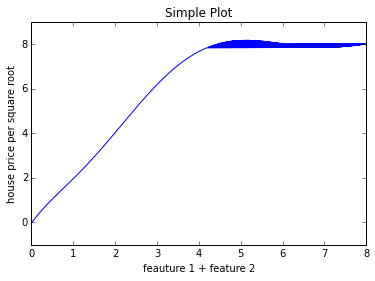

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

print x, y
print len(x), len(y)
model = Pipeline([('poly', PolynomialFeatures(degree=7)), ('linear', LinearRegression(fit_intercept=False))])
model.fit(x, y)

x_plot = [[i] for i in np.linspace(0, 8, 200)]
y_plot = model.predict(x_plot)
graph(x_plot, y_plot, func=plt.plot)